#1. Create a user-defined function to compute pairwise Pearson correlation coefficients. The function takes two variables as arguments and returns the correlation coefficient between them

In [166]:
import pandas as pd
import numpy as np

path= "/Users/varun/Desktop/MAchine learning/Assignments/Assignment_3/iris.csv"
df = pd.read_csv(path)

def Pearson(a,b):
    
    correlation= a.corr(b)
    
    print("Pearson correlation is:",correlation)
    

x= df['petal_length'] #petal_length,petal_width(we can take any feature as x and for y)
y= df['sepal_width']#petal_width


print(Pearson(x,y))

corr= df.corr() #correlation of all pairs
print("the correlation of all pairs is ")
print(corr)

Pearson correlation is: -0.42844010433053975
None
the correlation of all pairs is 
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


2.plot the graphs to visualize the correlation between two variables and also write a code to visualize the correlation matrix.

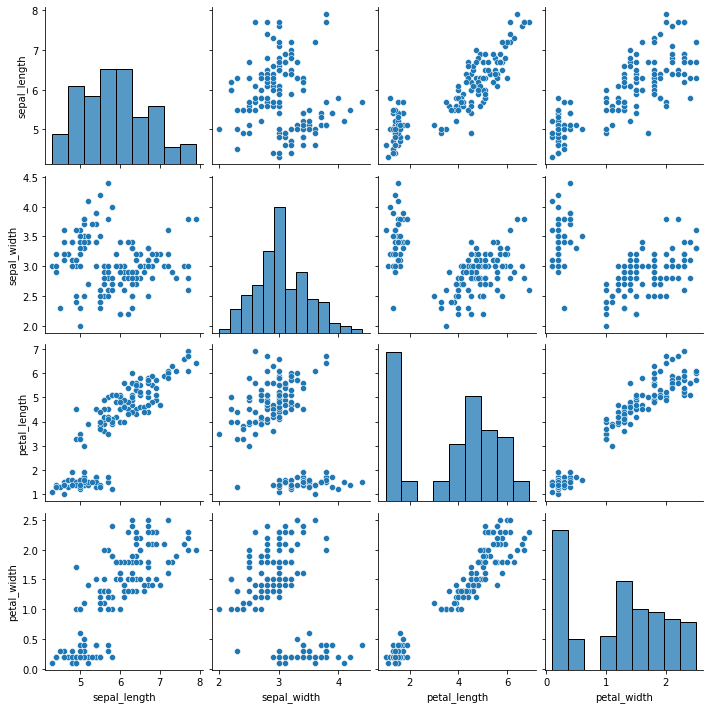

In [167]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams


%matplotlib inline
rcParams['figure.figsize']=12,6

sb.pairplot(df)



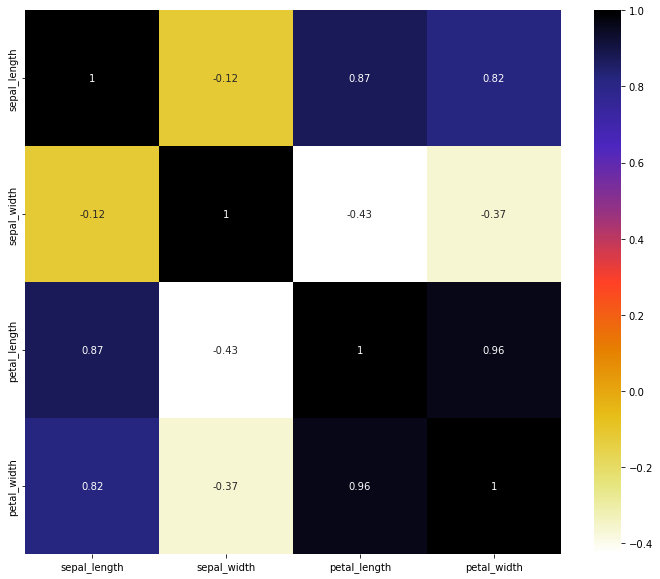

In [168]:
import seaborn as sb
plt.figure(figsize=(12,10))
cor = df.corr()
#print(cor)

sb.heatmap(cor, annot = True, cmap=plt.cm.CMRmap_r)
plt.show()

3. Perform z-score standardization on the data.

we know the formula of z-score that is,
# zscore = (value - mean)/standard_deviation

In [169]:
z_score=df.copy()
for col in ['sepal_length','sepal_width','petal_length','petal_width']:
    z_score[col]= (z_score[col] - z_score[col].mean())/z_score[col].std()
print(z_score.head(5))
print(z_score.tail(5))


   sepal_length  sepal_width  petal_length  petal_width species
0     -0.897674     1.015602     -1.335752    -1.311052  setosa
1     -1.139200    -0.131539     -1.335752    -1.311052  setosa
2     -1.380727     0.327318     -1.392399    -1.311052  setosa
3     -1.501490     0.097889     -1.279104    -1.311052  setosa
4     -1.018437     1.245030     -1.335752    -1.311052  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145      1.034539    -0.131539      0.816859     1.443994  virginica
146      0.551486    -1.278680      0.703564     0.919223  virginica
147      0.793012    -0.131539      0.816859     1.050416  virginica
148      0.430722     0.786174      0.930154     1.443994  virginica
149      0.068433    -0.131539      0.760211     0.788031  virginica


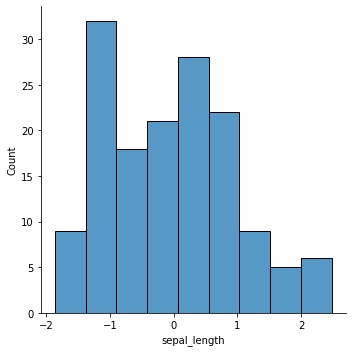

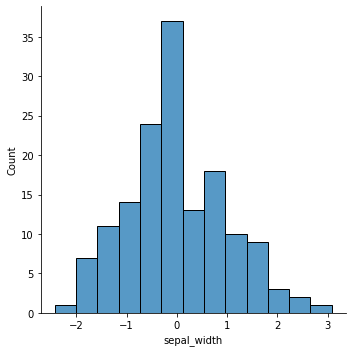

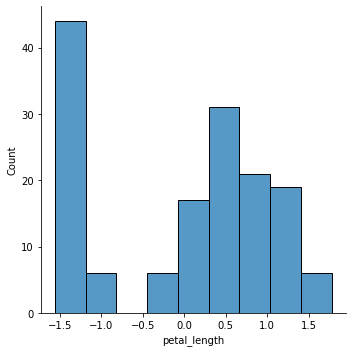

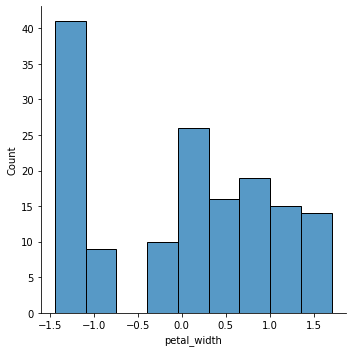

In [170]:
sb.displot(z_score['sepal_length'])
sb.displot(z_score['sepal_width'])
sb.displot(z_score['petal_length'])
sb.displot(z_score['petal_width'])

4. Compute covariance matrix for the standardized data.

In [171]:
z_score.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa
3,-1.501490,0.097889,-1.279104,-1.311052,setosa
4,-1.018437,1.245030,-1.335752,-1.311052,setosa


In [172]:
covariance_matrix= pd.DataFrame.cov(z_score)
covariance_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

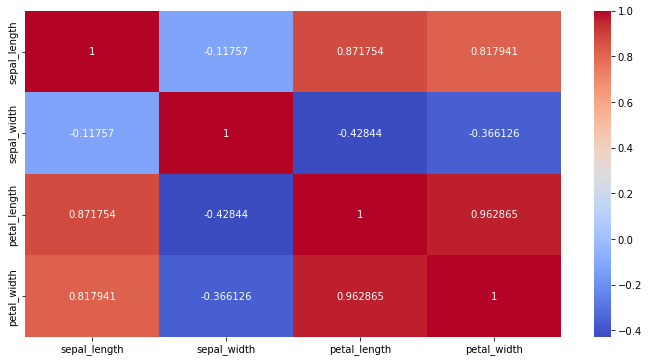

In [173]:
sb.heatmap(covariance_matrix, annot =True,fmt='g', cmap="coolwarm")

5. Find the eigenvalues and eigenvectors for the covariance matrix and print them in descending orde

In [174]:
import numpy as np
from numpy.linalg import eig
E_val,E_vec = eig(covariance_matrix)
print('Eigen_value: ', E_val)
print('Eigen_vector: ')
print(E_vec)

Eigen_value:  [2.91849782 0.91403047 0.14675688 0.02071484]
Eigen_vector: 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


<AxesSubplot:>

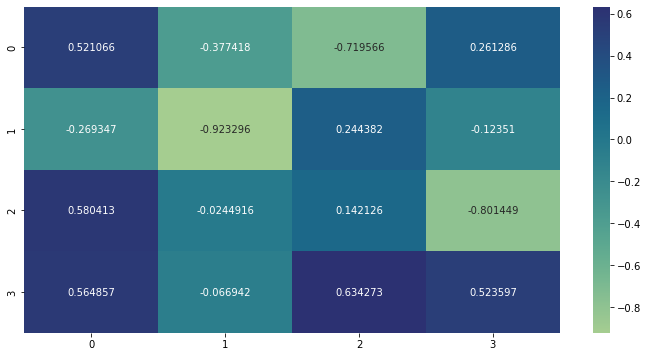

In [175]:
sb.heatmap(E_vec, annot =True,fmt='g', cmap="crest")